In [8]:
import os
import seaborn as sns
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [9]:
# Set style preset parameters from Seaborn 
#sns.set()
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set(font='Times New Roman')

In [10]:
# For plot to appear in the notebook
%matplotlib inline 

In [11]:
value_column = 'prcterror'
tests_df = pd.DataFrame()
for test in ['A','B','C','D','E','F','G','H','I','J']:
    folder = "/media/tais/My_Book_1/MAUPP/Traitement/Population_modelling_dasymetry/Results/Dakar/Random_Forest/Test_%s"%test
    file_name = "Test_%s_validation_level1"%test
    filepath = os.path.join(folder, file_name + '.dbf')
    gdf = gpd.read_file(filepath)
    tests_df['Test %s'%test] = gdf[value_column]

In [12]:
tests_df.head()

,Test A,Test B,Test C,Test D,Test E,Test F,Test G,Test H,Test I,Test J
0,-83.415033,-52.053060,-37.223523,-40.035189,-54.796907,-51.111332,-42.531472,-39.297351,-39.721740,-37.989025
1,-50.151290,-28.024803,-49.713917,-37.385677,-29.947317,-19.940957,-18.749599,-26.275571,-23.382871,-24.075157
2,-12.947257,9.314880,57.067438,17.668439,29.627222,42.874710,33.335187,45.966470,24.401234,28.162084
3,-2.578890,26.755643,29.074738,31.612642,34.948250,3.448015,19.267403,26.293892,25.601335,21.092202
4,14.542841,18.172752,5.003015,7.657519,18.248086,15.553693,18.055960,13.521349,12.854861,13.828460


In [13]:
plot_df = pd.melt(tests_df, value_vars=list(tests_df.columns), value_name=value_column)

In [14]:
plot_df.head()

,variable,prcterror
0,Test A,-83.415033
1,Test A,-50.151290
2,Test A,-12.947257
3,Test A,-2.578890
4,Test A,14.542841


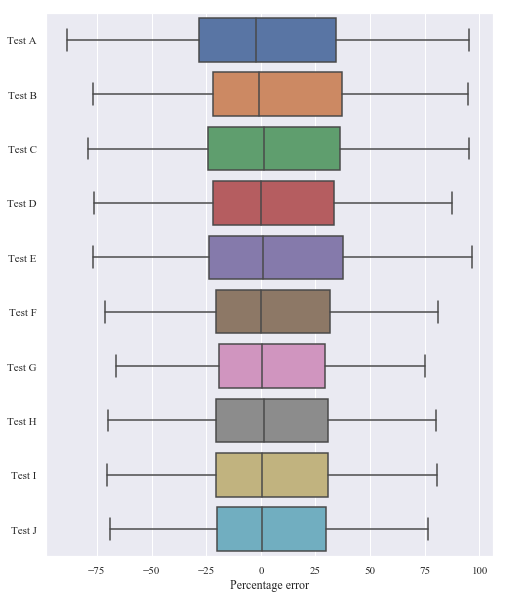

In [29]:
plt.figure(figsize=(8,10))
#sns.boxplot(x="variable", y=value_column, data=plot_df, orient="v")
ax = sns.boxplot(x=value_column, y="variable", data=plot_df, orient="h", whis=0.98, showfliers=False)
ax.set(xlabel='Percentage error', ylabel='')
result_folder = "/media/tais/My_Book_1/MAUPP/Traitement/Population_modelling_dasymetry/Results/Dakar/Random_Forest"
plt.savefig(os.path.join(result_folder, "Dakar_boxplot_%s.svg"%value_column), dpi=300, bbox_inches='tight')

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


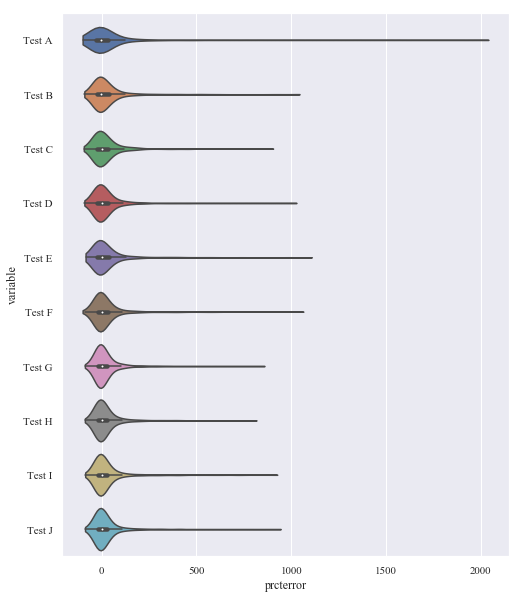

In [30]:
plt.figure(figsize=(8,10))
sns.violinplot(x=value_column, y="variable", data=plot_df, orient="h", cut=0)
#sns.violinplot(x=value_column, y="variable", data=plot_df[plot_df[value_column] < 200], orient="h", cut=0)
ax.set(xlabel='Percentage error', ylabel='')
result_folder = "/media/tais/My_Book_1/MAUPP/Traitement/Population_modelling_dasymetry/Results/Dakar/Random_Forest"
plt.savefig(os.path.join(result_folder, "Dakar_violin_%s.svg"%value_column), dpi=300, bbox_inches='tight')